In [2]:
import control as ct
from control.matlab import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
G = ct.tf([-1, 1], [1, 1])

In [5]:
print(G)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-s + 1
------
s + 1



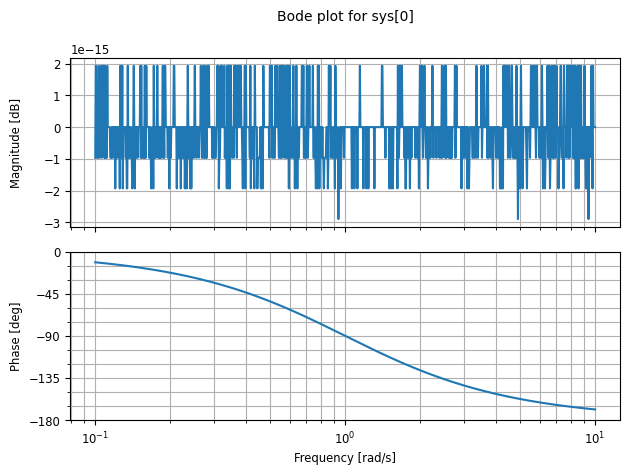

In [7]:
ct.bode(G)

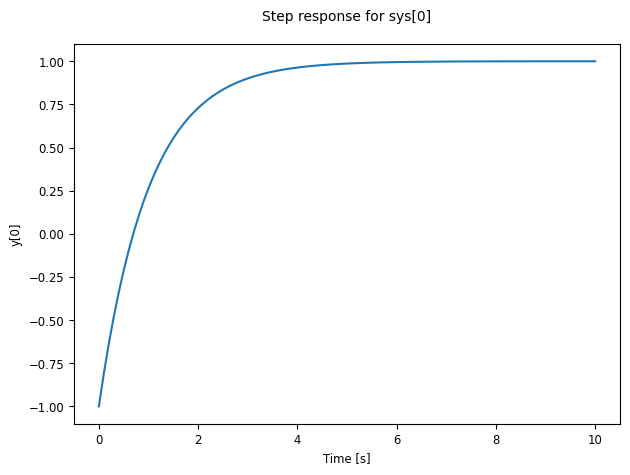

In [8]:
ct.step_response(G, T=10).plot()

In [9]:
kc1=0.2; kc2=0.5; kc3=0.8;


In [10]:
K1=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc1], [0.05, 1])); print(K1)

<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.2 s + 0.2
------------
0.05 s^2 + s



In [12]:
K2=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc2], [0.05, 1])); print(K2)

<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.5 s + 0.5
------------
0.05 s^2 + s



In [17]:
K3=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc3], [0.05, 1])); print(K3)

<TransferFunction>: sys[28]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.8 s + 0.8
------------
0.05 s^2 + s



In [27]:
K4=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc1], [0.0, 1])); K5=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc2], [0.0, 1])); K6=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc3], [0.0, 1]));

In [28]:
Loop1 = ct.series(K1, G, name="Loop1"); Loop2 = ct.series(K2, G, name="Loop2"); Loop3 = ct.series(K3, G, name="Loop3"); Loop4 = ct.series(K4, G, name="Loop4"); Loop5 = ct.series(K5, G, name="Loop5"); Loop6 = ct.series(K6, G, name="Loop6");

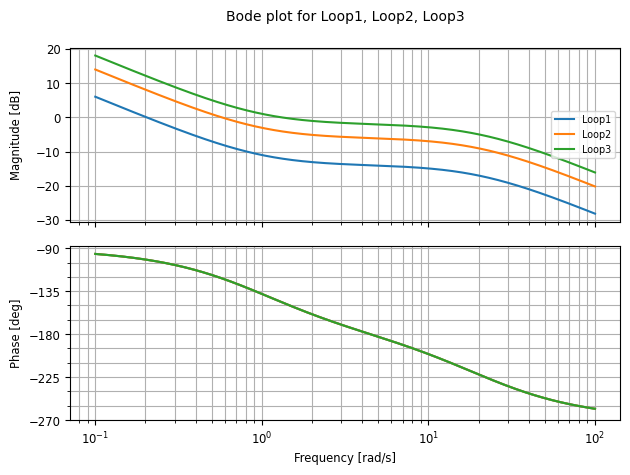

In [29]:
ct.bode([Loop1, Loop2, Loop3]); 

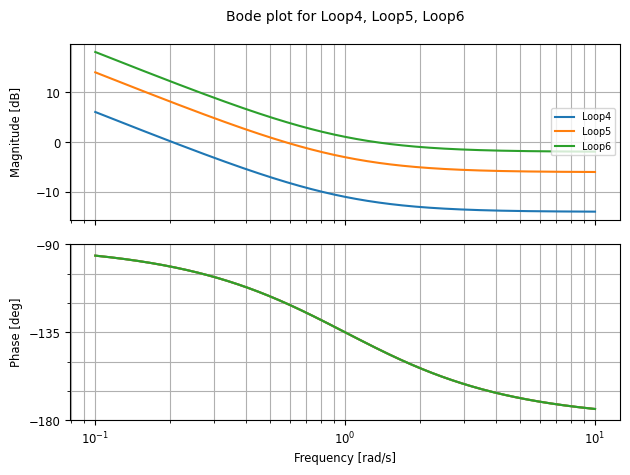

In [30]:
ct.bode([Loop4, Loop5, Loop6 ])


In [31]:
S1 = ct.feedback(1, Loop1, name="S1"); S2 = ct.feedback(1, Loop2, name="S2"); S3 = ct.feedback(1, Loop3, name="S3");

In [32]:
S4 = ct.feedback(1, Loop4, name="S4"); S5 = ct.feedback(1, Loop5, name="S5"); S6 = ct.feedback(1, Loop6, name="S6");

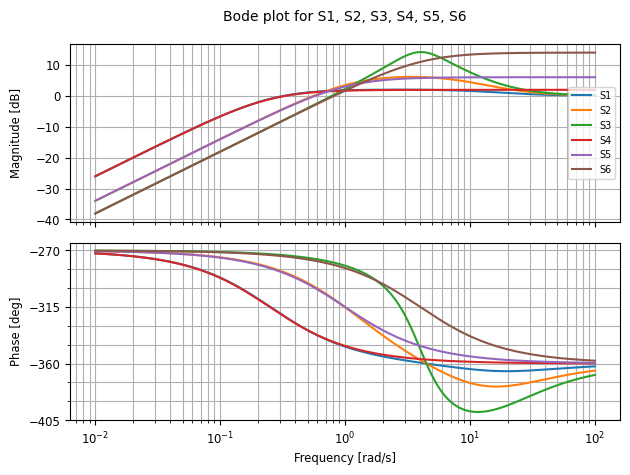

In [33]:
ct.bode([S1, S2, S3, S4, S5, S6,])

In [41]:
T1 = ct.feedback(Loop1, 1, name="T1"); T2 = ct.feedback(Loop2, 1, name="T2"); T3 = ct.feedback(Loop3, 1, name="T3");

In [42]:
T4 = ct.feedback(Loop4, 1, name="T4"); T5 = ct.feedback(Loop5, 1, name="T5"); T6 = ct.feedback(Loop6, 1, name="T6");

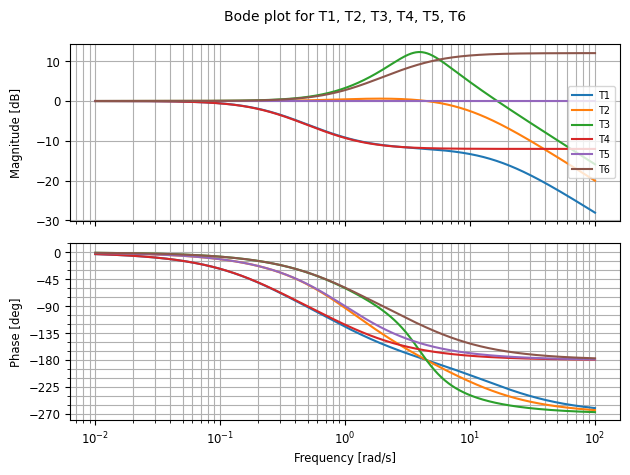

In [43]:
ct.bode([T1, T2, T3, T4, T5, T6])

In [46]:
t1, YT1 = ct.step_response(T1, T=10); t2, YT2 = ct.step_response(T2, T=10); t3, YT3 = ct.step_response(T3, T=10);

In [47]:
t4, YT4 = ct.step_response(T4, T=10); t5, YT5 = ct.step_response(T5, T=10); t6, YT6 = ct.step_response(T6, T=10);

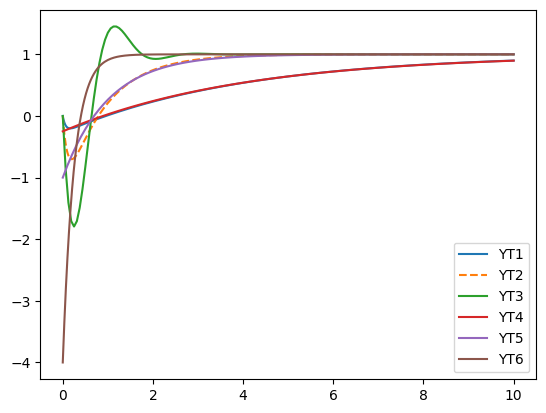

In [48]:
fig, ax=plt.subplots(); ax.plot(t1, YT1, label="YT1"); ax.plot(t2, YT2, label="YT2", linestyle="--"); ax.plot(t3, YT3, label="YT3"); ax.plot(t4, YT4, label="YT4"); ax.plot(t5, YT5, label="YT5"); ax.plot(t6, YT6, label="YT6"); plt.legend(); fig.show() 